In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn
import datetime
from dateutil import relativedelta

In [4]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [5]:
from preparation import load_data, extract_features

In [40]:
df, df_store = load_data(debug=False)
feat_matrix, features_x, feature_y = extract_features(df, df_store)

data loaded: (1058297, 11)
store loaded: (1115, 11)
extract_sales_feat: done
extract_recent_data: done
extract_store_feat: done
construct feature matrix: done
selected_features: done
process_missing: done
process_outliers: done
all features: ['AvgCustomers', 'AvgCustomersWeek', 'DayOfWeek', 'AvgCustomers3Months', 'Assortment', 'AvgCustomersMonth', 'AvgSchoolHoliday', 'Week', 'HolidayNextWeek', 'CompetitionDistance', 'DateInt', 'Month', 'DayOfMonth', 'AvgSales3Months', 'Year', 'StateHoliday', 'AvgPromo', 'AvgSalesWeek', 'StoreType', 'AvgSalesMonth', 'AvgStateHoliday', 'DayOfYear', 'Promo', 'AvgSales', 'CompetitionOpenSince', 'SchoolHoliday', 'HolidayLastWeek']
target: SalesLog
feature matrix dimension: (1058243, 32)


In [36]:
df, df_store = load_data(debug=False)


data loaded: (1058297, 11)
store loaded: (1115, 11)


In [44]:
def extract_sales_feat(df_raw):
    # Remove rows where store is open, but no sales.
    df = df_raw.loc[~((df_raw['Open'] == 1) & (df_raw['Sales'] == 0))].copy()

    features_x = ['Store', 'Date', 'DayOfWeek', 'Promo', 'SchoolHoliday', 'StateHoliday', 'Type']
    features_y = ['SalesLog', 'Sales', 'Customers']

    # log scale
    df.loc[(df['Type'] == 'train'), 'SalesLog'] = np.log1p(df.loc[(df['Type'] == 'train')]['Sales'])
    # date features
    date_feat = pd.Index(df['Date'])
    df['Week'] = date_feat.week
    df['Month'] = date_feat.month
    df['Year'] = date_feat.year
    df['DayOfMonth'] = date_feat.day
    df['DayOfYear'] = date_feat.dayofyear
    df['Week'] = df['Week'].fillna(0)
    df['Month'] = df['Month'].fillna(0)
    df['Year'] = df['Year'].fillna(0)
    df['DayOfMonth'] = df['DayOfMonth'].fillna(0)
    df['DayOfYear'] = df['DayOfYear'].fillna(0)
    df['DateInt'] = date_feat.year * 10000 + date_feat.month * 100 + date_feat.day
    features_x.remove('Date')
    features_x.append('Week')
    features_x.append('Month')
    features_x.append('Year')
    features_x.append('DayOfMonth')
    features_x.append('DayOfYear')
    features_x.append('DateInt')

    return df, features_x, features_y

In [45]:
df, features_x, features_y = extract_sales_feat(df)

In [18]:
train = df[df['Type'] == 'train']
test = df[df['Type'] == 'test']
val_2014 = df.loc[(df['DateInt'] >= 20140801) & (df['DateInt'] <= 20140917)]
val_2013 = df.loc[(df['DateInt'] >= 20130801) & (df['DateInt'] <= 20130917)]

### verify the distribution of Promo for different periods

### all training data

In [23]:
train['Promo'].value_counts() / train.shape[0]

0    0.618486
1    0.381514
Name: Promo, dtype: float64

In [26]:
val_2013['Promo'].value_counts() / val_2013.shape[0]

0    0.645832
1    0.354168
Name: Promo, dtype: float64

In [25]:
val_2014['Promo'].value_counts() / val_2014.shape[0]

0    0.604194
1    0.395806
Name: Promo, dtype: float64

In [27]:
test['Promo'].value_counts() / test.shape[0]

0    0.604167
1    0.395833
Name: Promo, dtype: float64

### verify the distribution of Promo2 for different periods


In [31]:
store_features = ['Store', 'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']

In [30]:
df_store.head()

,Unnamed: 0,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,c,a,1270,9,2008,0,23,2012,NaN
1,2,2,a,a,570,11,2007,1,13,2010,"Jan,Apr,Jul,Oct"
2,3,3,a,a,14130,12,2006,1,14,2011,"Jan,Apr,Jul,Oct"
3,4,4,c,c,620,9,2009,0,22,2012,NaN
4,5,5,a,a,29910,4,2015,0,24,2011,NaN


In [46]:
features_y

['SalesLog', 'Sales', 'Customers']

In [47]:
df = pd.merge(df[list(set(features_x + features_y))], df_store[store_features], how='left', on=['Store'])

In [48]:
train = df[df['Type'] == 'train']
test = df[df['Type'] == 'test']
val_2014 = df.loc[(df['DateInt'] >= 20140801) & (df['DateInt'] <= 20140917)]
val_2013 = df.loc[(df['DateInt'] >= 20130801) & (df['DateInt'] <= 20130917)]

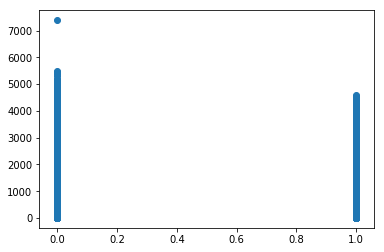

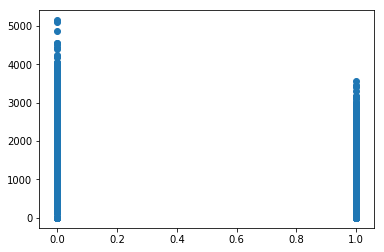

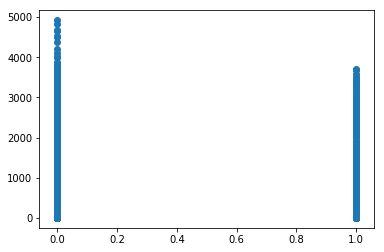

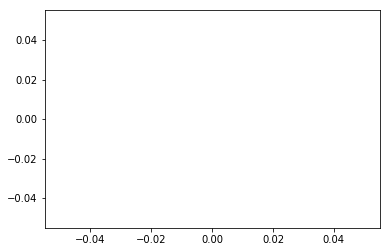

In [62]:
import matplotlib.pyplot as plt
plt.scatter(train['Promo2'], train['Customers'])
plt.show()
plt.scatter(val_2013['Promo2'], val_2013['Customers'])
plt.show()
plt.scatter(val_2014['Promo2'], val_2014['Customers'])
plt.show()
plt.scatter(test['Promo2'], test['Customers'])

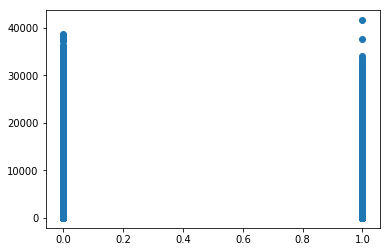

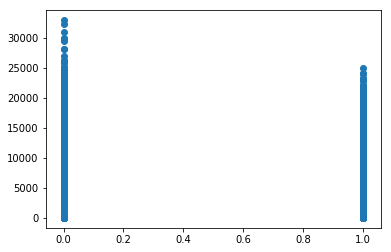

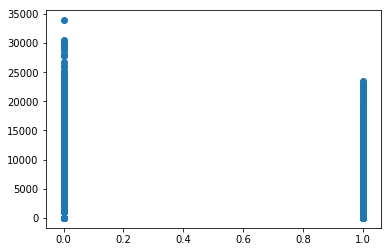

In [64]:
plt.scatter(train['Promo2'], train['Sales'])
plt.show()
plt.scatter(val_2013['Promo2'], val_2013['Sales'])
plt.show()
plt.scatter(val_2014['Promo2'], val_2014['Sales'])
plt.show()

In [78]:
sum(train[train['Promo2'] == 1]['Sales']) / sum(train['Sales']) 

0.4702116574084461

In [79]:
sum(val_2014[val_2014['Promo2'] == 1]['Sales']) / sum(val_2014['Sales']) 

0.4162563191994394

In [80]:
sum(val_2013[val_2013['Promo2'] == 1]['Sales']) / sum(val_2013['Sales']) 

0.4775215129368015

In [66]:
from outliers import smirnov_grubbs as grubbs


In [68]:
train.shape

(1017155, 24)

In [74]:
print(train.shape)
len(grubbs.max_test_outliers(train['Customers'], alpha=0.05))

(1017155, 24)


C:\Users\yunbo\Anaconda3\lib\site-packages\outliers\smirnov_grubbs.py:185: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  return data.argmax()


4921

In [99]:
df, df_store = load_data(debug=False)

data loaded: (1058297, 11)
store loaded: (1115, 11)


In [100]:
df_store['diffYear'] = 2015 - df_store['Promo2SinceYear']

In [101]:
df_store['diffWeeks'] = df_store['diffYear'] * 52 +  df_store['Promo2SinceWeek']

In [102]:
df, features_x, features_y = extract_sales_feat(df)

In [106]:
store_features = ['Store', 'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'diffWeeks']

In [107]:
df = pd.merge(df[list(set(features_x + features_y))], df_store[store_features], how='left', on=['Store'])

In [108]:
train = df[df['Type'] == 'train']
test = df[df['Type'] == 'test']
val_2014 = df.loc[(df['DateInt'] >= 20140801) & (df['DateInt'] <= 20140917)]
val_2013 = df.loc[(df['DateInt'] >= 20130801) & (df['DateInt'] <= 20130917)]

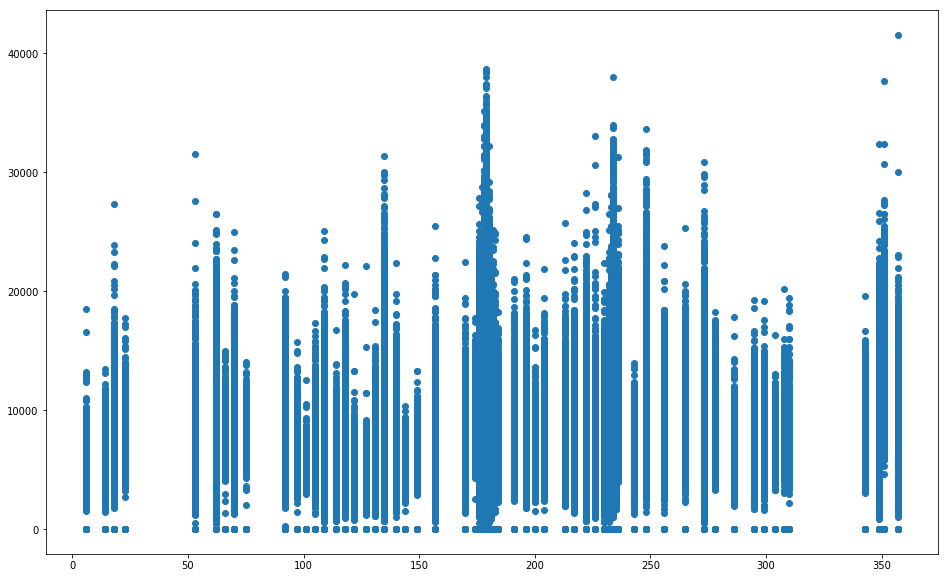

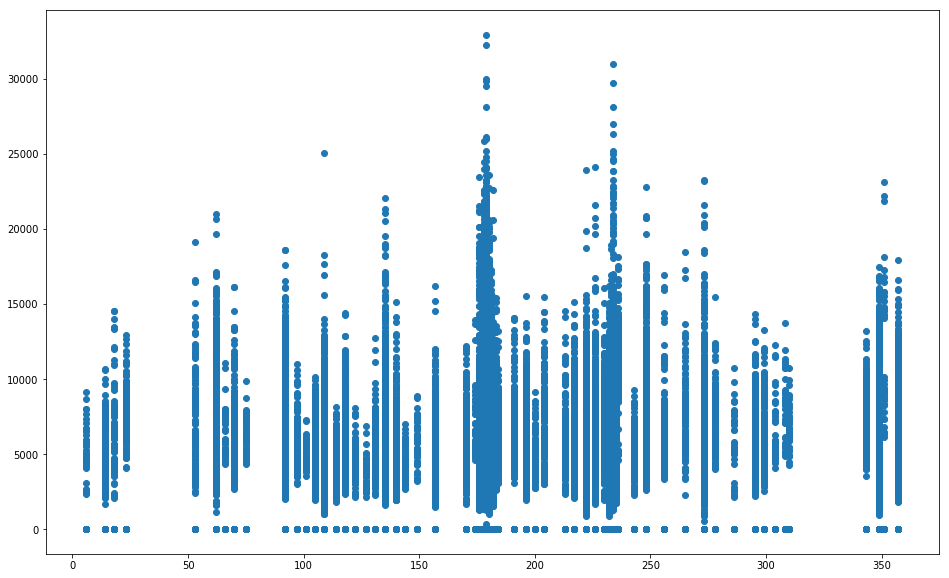

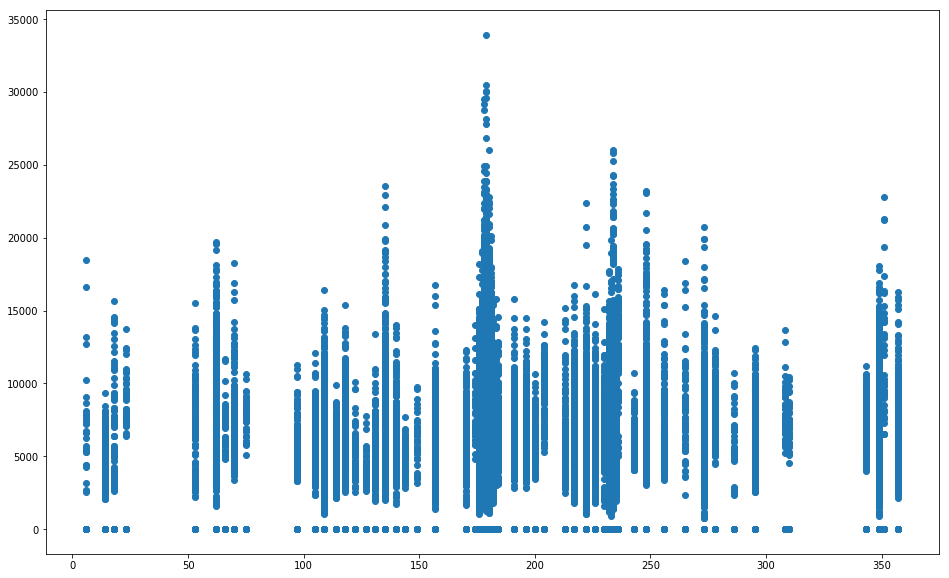

In [136]:
plt.figure(figsize=(16, 10))
plt.scatter(train['diffWeeks'], train['Sales'])
plt.show()
plt.figure(figsize=(16, 10))
plt.scatter(val_2013['diffWeeks'], val_2013['Sales'])
plt.show()
plt.figure(figsize=(16, 10))
plt.scatter(val_2014['diffWeeks'], val_2014['Sales'])
plt.show()

In [ ]:
train['diffWeeks']
train['Sales']

In [111]:
from sklearn.linear_model import LinearRegression

In [114]:
X = train['diffWeeks'].as_matrix().reshape(-1, 1)
reg = LinearRegression().fit(X, train['Sales'])

C:\Users\yunbo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [116]:
reg.coef_

array([0.59521401])

In [117]:
reg.intercept_

5660.697760006568

In [129]:
X = val_2013['diffWeeks'].as_matrix().reshape(-1, 1)
reg = LinearRegression().fit(X, val_2013['Sales'])
print(reg.coef_)
print(reg.intercept_)

[0.6138972]
5455.422711539366


C:\Users\yunbo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [134]:
X = val_2014['diffWeeks'].as_matrix().reshape(-1, 1)
reg = LinearRegression().fit(X, val_2014['Sales'])
print(reg.coef_)
print(reg.intercept_)

[1.14145355]
5624.384816136275


C:\Users\yunbo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [122]:
X = train['diffWeeks'].as_matrix().reshape(-1, 1)
reg = LinearRegression().fit(X, train['Customers'])
print(reg.coef_)
print(reg.intercept_)

[-0.14956728]
661.6820371408548


C:\Users\yunbo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [128]:
X = val_2013['diffWeeks'].as_matrix().reshape(-1, 1)
reg = LinearRegression().fit(X, val_2013['Customers'])
print(reg.coef_)
print(reg.intercept_)

[-0.14366584]
658.7446777542658


C:\Users\yunbo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [124]:
X = val_2014['diffWeeks'].as_matrix().reshape(-1, 1)
reg = LinearRegression().fit(X, val_2014['Customers'])
print(reg.coef_)
print(reg.intercept_)

[-0.10163708]
677.7068006565348


C:\Users\yunbo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [127]:
import numpy as np    

def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')

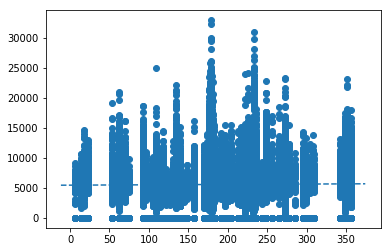

In [133]:
plt.scatter(val_2013['diffWeeks'], val_2013['Sales'])
abline(reg.coef_, reg.intercept_)

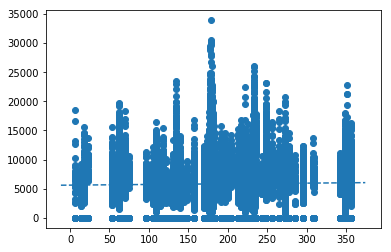

In [135]:
plt.scatter(val_2014['diffWeeks'], val_2014['Sales'])
abline(reg.coef_, reg.intercept_)